In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.filters as flt
%matplotlib inline
# since we can't use imports
import numpy as np
import scipy.ndimage.filters as flt
import warnings
from PIL import Image
import cv2

In [2]:
def anisodiff(img,niter=1,k=50,gamma=0.1,step=(1.,1.),sigma=0, option=1):

    # ...you could always diffuse each color channel independently if you
    # really want
    if img.ndim == 3:
        img = img.mean(2)

    # initialize output array
    img = np.array(img, dtype=np.float32)
    imgout = img.copy()

    # initialize some internal variables
    deltaS = np.zeros_like(imgout)
    deltaE = deltaS.copy()
    NS = deltaS.copy()
    EW = deltaS.copy()
    gS = np.ones_like(imgout)
    gE = gS.copy()
    
    for ii in np.arange(1,niter):
    
        # calculate the diffs
        deltaS[:-1,: ] = np.diff(imgout,axis=0)
        deltaE[: ,:-1] = np.diff(imgout,axis=1)

        if 0<sigma:
            s1=flt.gaussian_filter(deltaS,sigma)
            s2=flt.gaussian_filter(deltaE,sigma)
        else: 
            s1=deltaS
            s2=deltaE
        
        # conduction gradients (only need to compute one per dim!)
        if option == 1:
            gS = np.exp(-(s1/k)**2.)/step[0]
            gE = np.exp(-(s2/k)**2.)/step[1]
        elif option == 2:
            gS = 1./(1.+(s1/k)**2.)/step[0]
            gE = 1./(1.+(s2/k)**2.)/step[1]

        # update matrices
        E = gE*deltaE
        S = gS*deltaS

        # subtract a copy that has been shifted 'North/West' by one
        # pixel. don't as questions. just do it. trust me.
        NS[:] = S
        EW[:] = E
        NS[1:,:] -= S[:-1,:]
        EW[:,1:] -= E[:,:-1]

        # update the image
        imgout += gamma*(NS+EW)

    return imgout

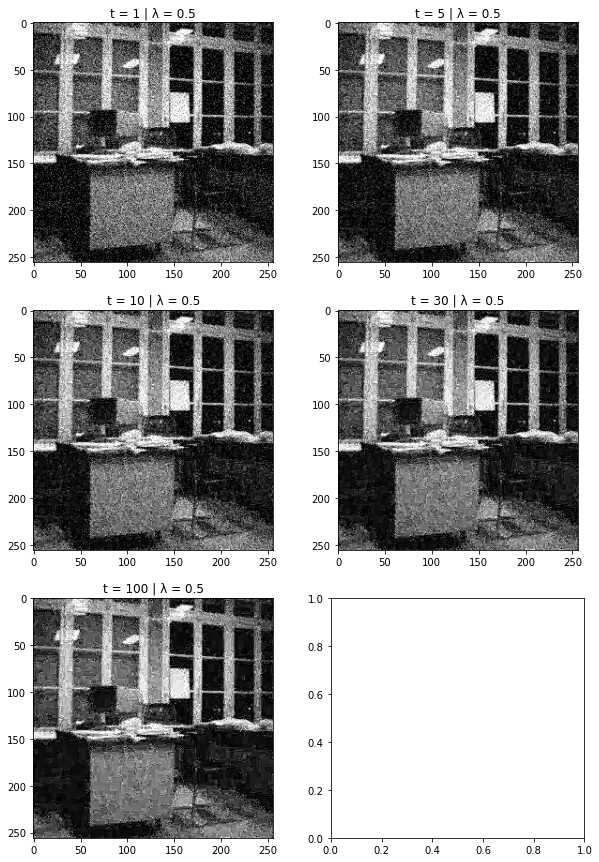

In [6]:
image = cv2.imread("./office_noisy.png")

results = [
        {
            "image": anisodiff(image,1,0.5,0.075,(1,1),2.5,1),
            "title": "t = 1 | λ = 0.5"
        },
        {
            "image": anisodiff(image,5,0.5,0.075,(1,1),2.5,1),
            "title": "t = 5 | λ = 0.5"
        },
        {
            "image": anisodiff(image,10,0.5,0.075,(1,1),2.5,1),
            "title": "t = 10 | λ = 0.5"
        },
        {
            "image": anisodiff(image,30,0.5,0.075,(1,1),2.5,1),
            "title": "t = 30 | λ = 0.5"
        },
        {
            "image": anisodiff(image,100,0.5,0.075,(1,1),2.5,1),
            "title": "t = 100 | λ = 0.5"
        },
    ]

_, axs = plt.subplots(3, 2, figsize=(10,15))
axs = axs.flatten()
for img, ax in zip(results, axs):
    ax.imshow(img["image"], cmap='gray')
    ax.set_title(img["title"])
plt.show()


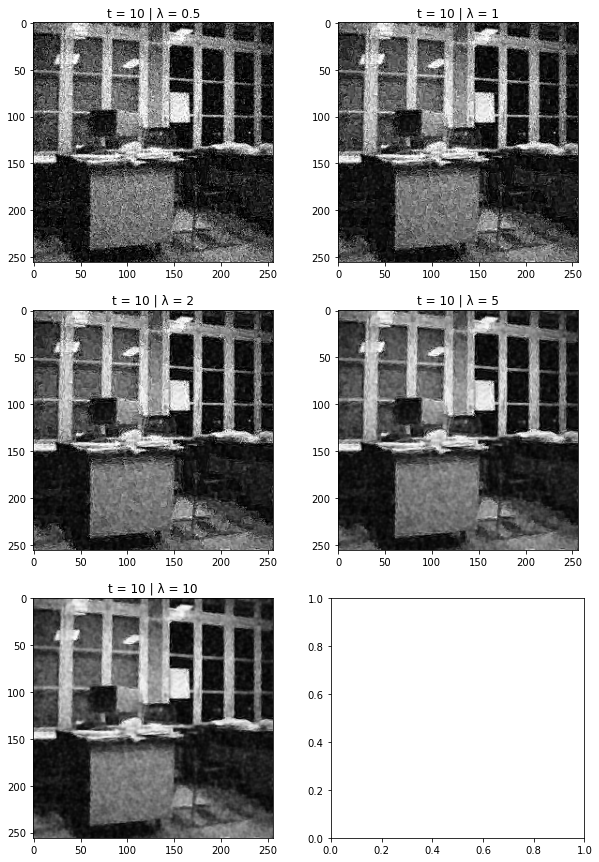

In [7]:
image = cv2.imread("./office_noisy.png")

results = [
        {
            "image": anisodiff(image,10,0.5,0.075,(1,1),2.5,1),
            "title": "t = 10 | λ = 0.5"
        },
        {
            "image": anisodiff(image,10,1,0.075,(1,1),2.5,1),
            "title": "t = 10 | λ = 1"
        },
        {
            "image": anisodiff(image,10,2,0.075,(1,1),2.5,1),
            "title": "t = 10 | λ = 2"
        },
        {
            "image": anisodiff(image,10,5,0.075,(1,1),2.5,1),
            "title": "t = 10 | λ = 5"
        },
        {
            "image": anisodiff(image,10,10,0.075,(1,1),2.5,1),
            "title": "t = 10 | λ = 10"
        },
    ]

_, axs = plt.subplots(3, 2, figsize=(10,15))
axs = axs.flatten()
for img, ax in zip(results, axs):
    ax.imshow(img["image"], cmap='gray')
    ax.set_title(img["title"])
plt.show()
